# 15-plots in plotly

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Import dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## 1. Scatter plot

In [5]:
fig1 = px.scatter(df, x='sepal_length' , y='sepal_width', color="species")
fig1.show()

# save the plot
fig1.write_image("./outputs/fig1.png", scale=3)

* `color="species"`  # differentiate color by specie

# 2. Line plot

In [6]:
# sort the data by sepal length
df_line = df.sort_values(by=['sepal_length'])  # df_line is a variable name
fig2 = px.line(df_line, x='sepal_length' , y='sepal_width', color="species")
fig2.show()

#save the plot
fig2.write_image("./outputs/fig2.png", scale=3)

# # draw 3d plot with plotly 
# fig3 = px.scatter_3d(df, x='sepal_length' , y='sepal_width', z='petal_width', color="species")
# fig3.show()

* `scale=3` means 3 times the default size
* `color="species"` means that the color of the line will be different for each species (as shownin figure)

# 3. Bar plot

In [7]:
# group values based on means
df_bar = df.groupby(['species']).mean().reset_index() # df_bar is a variable name
df_bar.head() # check top 5 rows

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.006,3.428,1.462,0.246
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


#### Point to be noted:
* why we need to reset index in plotly
* why taking mean is important in plotly?
* we don't need to reset index in Seaborn, because it adjust the index automatically

In [8]:
fig3 = px.bar(df_bar, x='species' , y='sepal_width')
fig3.show()
# save the plot
fig3.write_image("./outputs/fig3.png", scale=3)

<Axes: xlabel='species', ylabel='sepal_width'>

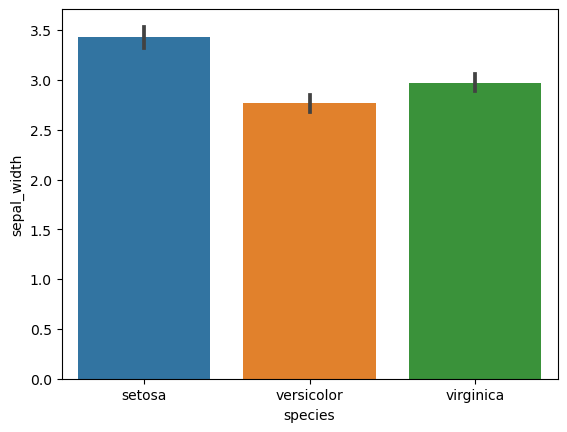

In [9]:
# seaborn does not need to make mean groups

sns.barplot(df, x="species", y= "sepal_width")

#### Why `Seaborn` not need to make mean groups?
* Seaborn's `barplot` function automatically calculates the mean of the data for each category and displays the mean values as bars. This is a feature of Seaborn that simplifies the process of creating bar plots for the average of a variable.

#### Why `Plotly` need to make mean groups?
* Plotly does not automatically calculate the mean. If you want to create a bar plot of the mean values using Plotly, you would first need to calculate the mean values yourself, typically using a function like `groupby` and `mean` from pandas.

> This `difference between Seaborn and Plotly` is simply a design choice made by the developers of the two libraries. Seaborn is designed to make it easy to create statistical graphics, and automatically calculating the mean for bar plots is a part of that. Plotly, on the other hand, provides more flexibility and does not make as many assumptions about what you want to do.

# 4. Boxplot

In [10]:
# Box plot

fig4 = px.box(df, x='species' , y='sepal_width', color = 'species')
fig4.show()

# save the plot
fig4.write_image("./outputs/fig4.png", scale=3)

* figure shows that there are `outliers` in the data in the `setosa species`
* we can `remove the outlier` by using the following code:
  * df = df[df['species'] != 'setosa']

# 5. Violin plot

In [11]:
# violon plot

fig5 = px.violin(df, x='species' , y='sepal_width', color = 'species', box=True)
fig5.show()

# save the plot
fig5.write_image("./outputs/fig5.png", scale=3)

* `box=true` shows the box plot inside the violin plot 

# 6. Histogram

In [12]:
#6 histogram

fig6 = px.histogram(df, x='sepal_width',color = 'species')
fig6.show()

# save the plot
fig6.write_image("./outputs/fig6.png", scale=3)

* `color = 'species'` shows the distribution of each species in different colors

# 7. Pie Chart

In [13]:
# first we have to check the dataset
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

* Why we need to check the dataset? because we need to know the number of each species
* What is the relation between fnding the number of each species and making a pie chart? 
* What is the number of each species? 50
* How many species we have? 3
  * So we can make a pie chart

In [14]:
# piechart
df_pie = df['species'].value_counts().reset_index()  

df_pie.columns = ['species', 'count']   
# this line is used to rename the columns of the df_pie dataframe
fig7 = px.pie(df_pie, values='count', names='species')
fig7.show()

# save the plot
fig7.write_image("./outputs/fig7.png", scale=3)

* `df_pie` is a new dataframe that contains the species and their counts
* `value_counts()` is used to count the number of species in descending order &
* `reset_index()` is used to convert this series into a dataframe

# 8. Scatter 3D plot

In [15]:
# scatter 3d plot
fig8 = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width', color='species')
fig8.show()

# save the plot in html
fig8.write_html("./outputs/fig8.html")

# 9. Area chart

In [16]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [17]:
# area chart
df_area = df.sort_values(by=['sepal_length'])

fig9 = px.area(df_area, x='sepal_width', y='sepal_length', color='species')
fig9.show()

# save the plot
fig9.write_image("./outputs/fig9.png", scale=3)

* `df_area` is a new dataframe name
* sort the data by '`sepal length`' and then draw the plot

# 10. Bubble Chart

In [18]:
# bubble chart

fig10 = px.scatter(df, x='sepal_length', y='sepal_width', size='petal_length', color='species')
fig10.show()

* bubbles inside the scatter plot
* `size='petal_length'` creates bubbles

# 11. Sunburst chart

In [19]:
# 11 sunburst chart
df_sunburst = df.groupby(['species', 'petal_width']).size().reset_index(name='counts')

fig11 = px.sunburst(df_sunburst, path=['species', 'petal_width'], values='counts')
fig11.show()

# save this plot as html
fig11.write_html("./outputs/fig11.html")

#save this plot
fig11.write_image("./outputs/fig11.png", scale=3)

* sunburst chart is a way of visualizing `hierarchical data structers` (categorical values)
* `df_sunburst` contains the counts of each unique combination of `species `and `petal_width`
* `path` parameter specifies the hierarchy of categories in the chart
* `values` parameter determine the size of each sector of the chart  

Let's try another sunburst plot

In [20]:
# create sunburst plot on titanic dataset
import plotly.express as px
import seaborn as sns
# Load Titanic dataset
titanic = sns.load_dataset('titanic')
# Create a sunburst plot
fig = px.sunburst(titanic, 
                  path=['sex','class', 'who', 'alive', 'alone'], 
                  values='survived' , color='sex')
# Show the plot
fig.show()

c:\Users\Hp\miniconda3\envs\python_eda\Lib\site-packages\plotly\express\_core.py:1619: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



c:\Users\Hp\miniconda3\envs\python_eda\Lib\site-packages\plotly\express\_core.py:1619: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\Hp\miniconda3\envs\python_eda\Lib\site-packages\plotly\express\_core.py:1619: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\Hp\miniconda3\envs\python_eda\Lib\site-packages\plotly\express\_core.py:1619: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [21]:
pip install --upgrade plotly pandas

Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
import plotly
print(pd.__version__)
print(plotly.__version__)

2.1.4
5.9.0


# 12. Parallel Coordinates plot

In [37]:
import plotly.graph_objects as go

# Add a numeric species_id based on species names for coloring
df['species_id'] = df['species'].astype('category').cat.codes

# Parallel Coordinates Plot
fig12 = px.parallel_coordinates(df, color='species_id', labels={'species_id': 'species'}, color_continuous_scale=px.colors.diverging.Tealrose)
# fig12 = px.parallel_coordinates(df, color='species_id', labels={'species_id': 'species'})
fig12.show()

# save the plot in html
fig12.write_html("./outputs/fig12.html")

#save the plot
fig12.write_image("./outputs/fig12.png", scale=3)

AttributeError: 'DataFrame' object has no attribute 'iteritems'

* `astype('category').cat.codes` is used to convert categorical data into numerical data
* `cat.codes` is used to convert categorical data into numerical data
* `df['species']` is the new column name which we want to convert into numerical data
* `df['species'].astype('category')` is used to convert the column into categorical data
* told commonalities & differences
* it'll be helpful in ML

# 13. Density contour plot

In [34]:
# Desity contour plot
df = sns.load_dataset('iris')

fig13 = px.density_contour(df, x='sepal_length', y='sepal_width', color='species')
fig13.show()

# save this plot
fig13.write_image("./outputs/fig13.png", scale=3)

* density contour plot shows the `density of the data points` in the form of contour lines 
* `contour lines` are the lines that join the points of equal values
* the contour lines are called `isopleths` or isarithms
* the contour lines are used to `show the elevation` on a topographic map

# 14. Ternary Plot

In [36]:
# Ternary Plot
df = sns.load_dataset('iris')

fig14 = px.scatter_ternary(df, a='sepal_length', b='sepal_width', c='petal_width', color='species')
fig14.show()

# save this plot
fig14.write_image("./outputs/fig14.png", scale=3)

* easiest way to show the cmparison between different variables 
* we can easily `find outlier` too
* ternary plot shows the `relationship between three variables`
* a, b, c are three variables
* a+b+c = 1
* a, b, c are three sides of a triangle
* a, b, c are three corners of a triangle
* a, b, c are three components of a vector
* ternary plot is also called triangle plot

# 15. Polar chart (Radar Chart)

In [40]:
# Polar chart (Radar Chart)

df = sns.load_dataset('iris')
df_radar = df.groupby(['species']).mean().reset_index()

fig15 = px.line_polar(df_radar, r='sepal_length', theta='species', line_close=True)
fig15.show()

# save the plot
fig15.write_image("./outputs/fig15.png", scale=3)

AttributeError: 'DataFrame' object has no attribute 'append'

In [41]:
import plotly.graph_objects as go
import seaborn as sns

df = sns.load_dataset('iris')
df_radar = df.groupby(['species']).mean().reset_index()

fig15 = go.Figure()

for species in df_radar['species'].unique():
    df_species = df_radar[df_radar['species'] == species]
    fig15.add_trace(go.Scatterpolar(
        r=df_species['sepal_length'],
        theta=df_species['species'],
        fill='toself',
        name=species
    ))

fig15.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
        )),
    showlegend=True
)

fig15.show()

# save the plot
fig15.write_image("./outputs/fig15.png", scale=3)

---

# Information about the instructor:

[<img src="https://i1.rgstatic.net/ii/profile.image/586711738368000-1516894387796_Q512/Muhammad-Tufail-22.jpg" width="20%">](https://www.facebook.com/groups/codanics/permalink/1872283496462303/ "Image")

**Dr. Muhammad Aammar Tufail**

PhD Data Science in Agriculture\
[Youtube channel](https://www.youtube.com/channel/UCmNXJXWONLNF6bdftGY0Otw/)\
[Twitter](https://twitter.com/aammar_tufail)\
[Linkedin](https://www.linkedin.com/in/muhammad-aammar-tufail-02471213b/)\
[github](https://github.com/AammarTufail)
